In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense

C:\Users\himan\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_excel('crop yield data sheet.xlsx')


In [3]:
df

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      100 non-null    object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


In [5]:
df.describe()

,Rain Fall (mm),Fertilizer,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,849.797980,67.808081,70.737374,21.131313,18.060606,9.050505
std,400.042676,10.028202,6.677079,1.951695,1.817254,1.965902
min,400.000000,50.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,65.000000,19.500000,16.000000,7.000000
50%,1150.000000,70.000000,71.000000,21.000000,19.000000,9.000000
75%,1237.500000,77.000000,77.000000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,80.000000,25.000000,22.000000,12.000000


In [6]:
df.shape

(109, 7)

In [7]:
df.isnull().sum()

Rain Fall (mm)    10
Fertilizer        10
Temperatue         9
Nitrogen (N)      10
Phosphorus (P)    10
Potassium (K)     10
Yeild (Q/acre)    10
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
94,1250.0,77.0,28,78.0,23.0,20.0,9.0
95,425.0,60.0,39,65.0,19.0,17.0,6.5
96,1220.0,79.0,28,77.0,23.0,21.0,10.5
97,480.0,65.0,36,68.0,21.0,16.0,7.0


In [10]:
df.columns

Index(['Rain Fall (mm)', 'Fertilizer', 'Temperatue', 'Nitrogen (N)',
       'Phosphorus (P)', 'Potassium (K)', 'Yeild (Q/acre)'],
      dtype='object')

In [11]:
df['Temperatue'] = df['Temperatue'].astype(int)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      99 non-null     int32  
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), int32(1)
memory usage: 5.8 KB


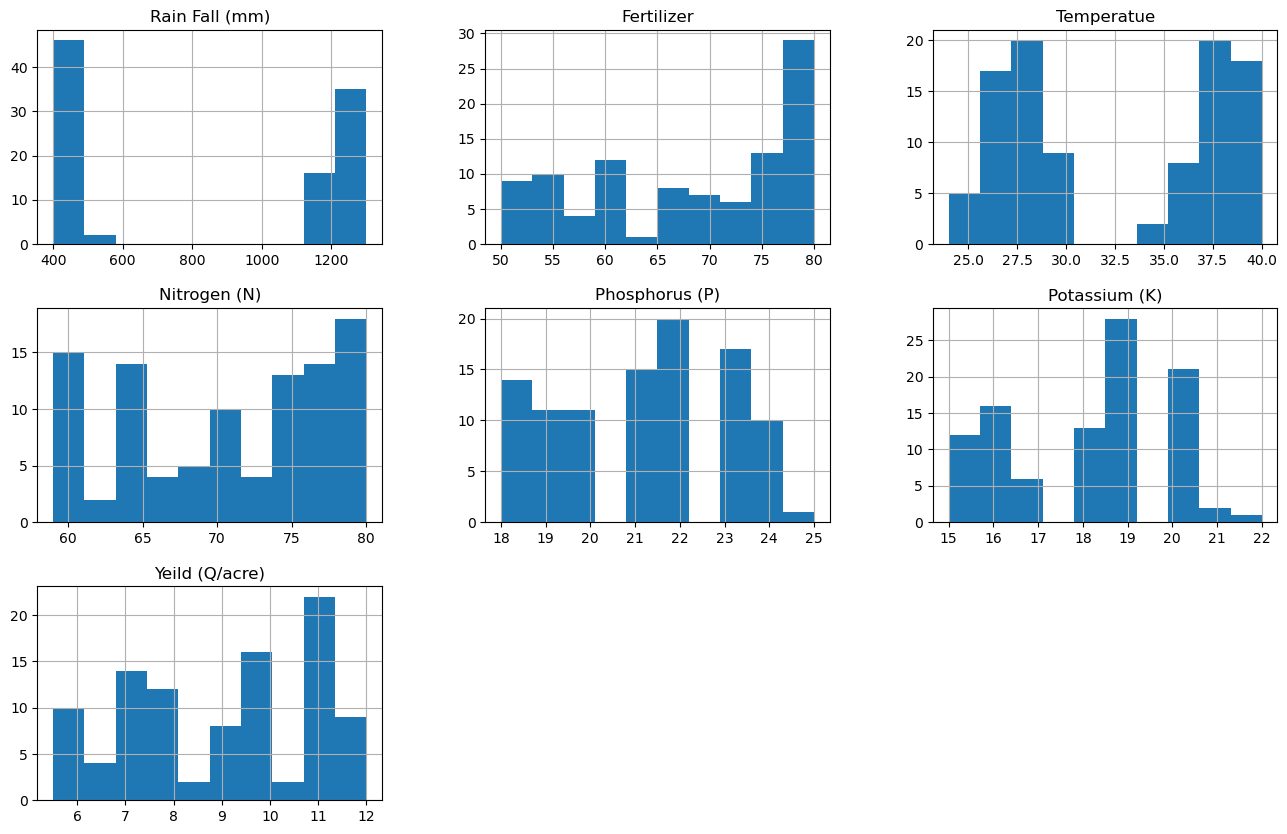

In [13]:
df.hist(figsize=(16,10))
plt.show()

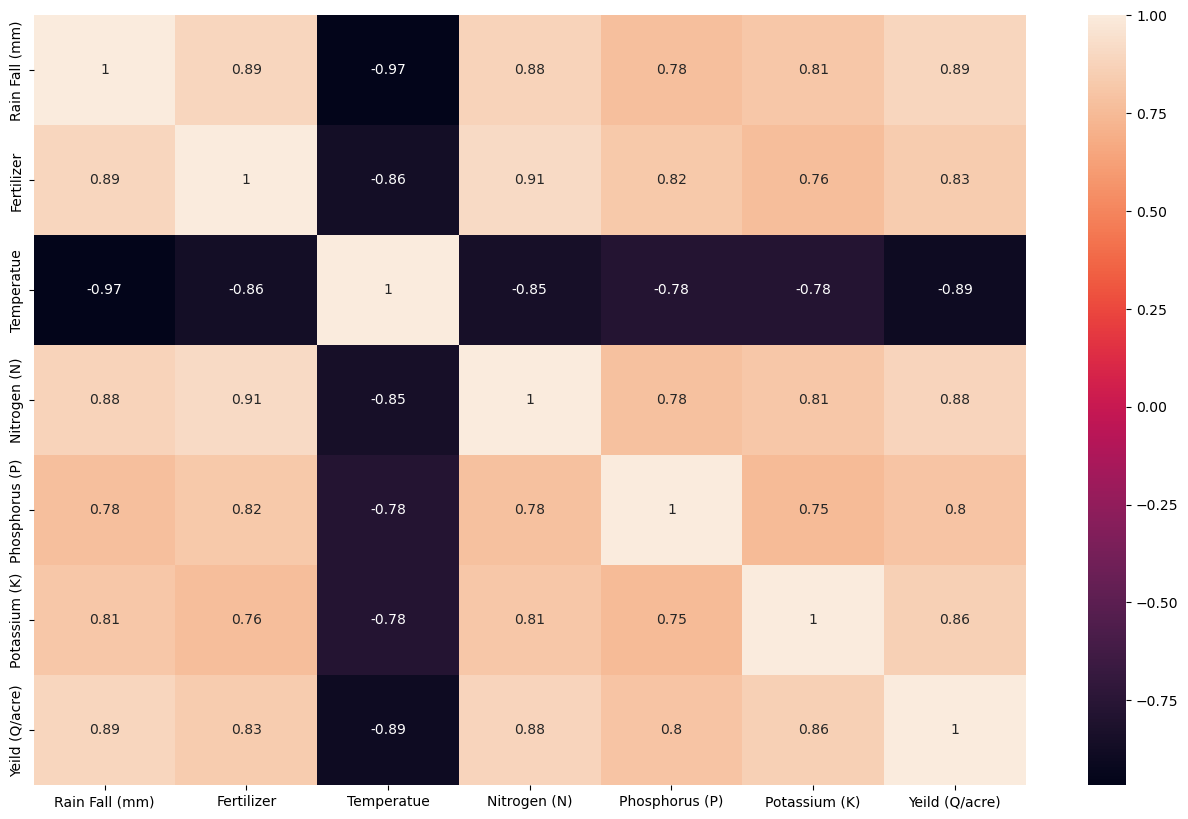

In [14]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [15]:
x = df.drop('Yeild (Q/acre)',axis = 1)
y = df['Yeild (Q/acre)']

In [16]:
x

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K)
0,1230.0,80.0,28,80.0,24.0,20.0
1,480.0,60.0,36,70.0,20.0,18.0
2,1250.0,75.0,29,78.0,22.0,19.0
3,450.0,65.0,35,70.0,19.0,18.0
4,1200.0,80.0,27,79.0,22.0,19.0
...,...,...,...,...,...,...
94,1250.0,77.0,28,78.0,23.0,20.0
95,425.0,60.0,39,65.0,19.0,17.0
96,1220.0,79.0,28,77.0,23.0,21.0
97,480.0,65.0,36,68.0,21.0,16.0


In [17]:
y

0     12.0
1      8.0
2     11.0
3      9.0
4     11.0
      ... 
94     9.0
95     6.5
96    10.5
97     7.0
98    12.0
Name: Yeild (Q/acre), Length: 99, dtype: float64

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state =42)


In [19]:
xtrain.shape

(79, 6)

In [20]:
ytrain.shape

(79,)

In [21]:
xtest.shape

(20, 6)

In [22]:
ytest.shape

(20,)

In [23]:
scaler = MinMaxScaler()
xtrain_scaled = pd.DataFrame(scaler.fit_transform(xtrain),columns = xtrain.columns)
xtest_scaled = pd.DataFrame(scaler.transform(xtest), columns = xtest.columns)


In [24]:
xtrain_scaled

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K)
0,0.055556,0.000000,0.8125,0.047619,0.000000,0.000000
1,0.938889,0.900000,0.1875,0.761905,0.571429,0.833333
2,0.916667,0.833333,0.3125,0.857143,0.714286,0.666667
3,0.000000,0.333333,0.9375,0.047619,0.000000,0.000000
4,0.044444,0.266667,0.8125,0.333333,0.571429,0.500000
...,...,...,...,...,...,...
74,0.861111,0.900000,0.0625,0.761905,0.571429,0.666667
75,0.055556,0.300000,1.0000,0.380952,0.000000,0.166667
76,0.944444,0.666667,0.0000,0.523810,0.571429,0.500000
77,0.833333,0.933333,0.3125,0.857143,0.428571,0.500000


In [25]:
xtest_scaled

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K)
0,0.888889,0.833333,0.1875,0.952381,0.428571,0.833333
1,0.972222,0.933333,0.2500,0.857143,0.714286,1.000000
2,0.027778,0.333333,0.9375,0.285714,0.142857,0.333333
3,0.833333,0.900000,0.2500,0.809524,0.714286,0.833333
4,0.088889,0.500000,0.7500,0.428571,0.428571,0.166667
5,1.000000,0.866667,0.2500,0.857143,0.571429,0.833333
6,0.888889,0.833333,0.1875,0.809524,0.428571,0.666667
7,0.861111,0.933333,0.2500,0.761905,0.714286,1.166667
8,0.977778,1.000000,0.1250,1.000000,0.857143,0.833333
9,0.922222,1.000000,0.2500,1.000000,0.857143,0.833333


In [26]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
prediction = lr.predict(xtest)

In [29]:
prediction

array([11.10759135, 11.11653024,  7.22615441, 10.80875147,  7.78534492,
       10.71223473, 10.48972924, 11.3432076 , 11.49383363, 11.15470752,
        6.47331908, 11.09679181,  8.27058576,  6.02160888, 10.91128705,
       10.77290268,  7.50187086, 10.80661688, 10.56284586,  8.28768696])

In [27]:
mae1 = mean_absolute_error(ytest,prediction)
mse1 = mean_squared_error(ytest,prediction)
r2_score1 = r2_score(ytest,prediction)

In [30]:
print(f'MAE: {mae1}')
print(f'MSE: {mse1}')
print(f'R2 : {r2_score1}')

MAE: 0.5124334333422782
MSE: 0.4398946477607527
R2 : 0.9060430601498859


In [31]:
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_regressor.fit(xtrain, ytrain)
predictions = rf_regressor.predict(xtest)

In [32]:
predictions

array([11.00645715, 10.25148491,  7.25334796, 10.11186221,  7.94974288,
       10.51550672, 10.70914465, 10.29417506, 11.759125  , 11.84278409,
        7.07608665, 11.874625  ,  8.10647989,  5.81665781, 11.199108  ,
       11.05320075,  7.47613259, 10.30594374, 10.39609425,  8.14709432])

In [33]:
mae2 = mean_absolute_error(ytest,prediction)
mse2 = mean_squared_error(ytest,prediction)
r2r2_score2 = r2_score(ytest,prediction)
print(f'MAE: {mae2}')
print(f'MSE: {mse2}')
print(f'R2 : {r2r2_score2}')

MAE: 0.5124334333422782
MSE: 0.4398946477607527
R2 : 0.9060430601498859


In [34]:
dt_regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=2, random_state=42)
dt_regressor.fit(xtrain, ytrain)
predictions = dt_regressor.predict(xtest)

In [35]:
mae3 = mean_absolute_error(ytest,prediction)
mse3 = mean_squared_error(ytest,prediction)
r2r2_score3 = r2_score(ytest,prediction)
print(f'MAE: {mae3}')
print(f'MSE: {mse3}')
print(f'R2 : {r2r2_score3}')

MAE: 0.5124334333422782
MSE: 0.4398946477607527
R2 : 0.9060430601498859


In [36]:
xgb_regressor = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_regressor.fit(xtrain, ytrain)
predictions = xgb_regressor.predict(xtest)

In [37]:
predictions

array([10.859425 , 10.036005 ,  7.0032167, 10.220263 ,  7.915072 ,
       10.036164 , 10.51536  , 10.18306  , 11.957658 , 11.998911 ,
        6.600166 , 11.960411 ,  8.295976 ,  5.590505 , 11.741532 ,
       11.461417 ,  7.876133 ,  9.972852 , 10.555623 ,  8.095885 ],
      dtype=float32)

In [38]:
mae4 = mean_absolute_error(ytest,prediction)
mse4 = mean_squared_error(ytest,prediction)
r2r2_score4 = r2_score(ytest,prediction)
print(f'MAE: {mae4}')
print(f'MSE: {mse4}')
print(f'R2 : {r2r2_score4}')

MAE: 0.5124334333422782
MSE: 0.4398946477607527
R2 : 0.9060430601498859


In [39]:
model = Sequential()
model.add(Dense(64, input_dim=xtrain.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.fit(xtrain, ytrain, epochs=100, batch_size=32, validation_data=(xtest, ytest))

predictions = model.predict(xtest)



Epoch 1/100


3/3 [==============================] - 1s 83ms/step - loss: 648.6595 - mean_absolute_error: 19.0493 - val_loss: 565.8376 - val_mean_absolute_error: 23.6488
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 566.9692 - mean_absolute_error: 23.4457 - val_loss: 152.5760 - val_mean_absolute_error: 10.4577
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 173.8804 - mean_absolute_error: 11.8360 - val_loss: 364.9940 - val_mean_absolute_error: 17.3728
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 336.6341 - mean_absolute_error: 15.8284 - val_loss: 197.2949 - val_mean_absolute_error: 13.3530
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 152.1335 - mean_absolute_error: 11.4562 - val_loss: 99.4785 - val_mean_absolute_error: 8.8267
Epoch 6/100
3/3 [==============================] - 0s 24ms/step - loss: 158.1588 - mean_absolute_error: 11.4964 - val_loss: 120.7856 - val_mean_absolute_error

In [40]:
mae5 = mean_absolute_error(ytest,prediction)
mse5 = mean_squared_error(ytest,prediction)
r2r2_score5 = r2_score(ytest,prediction)
print(f'MAE: {mae5}')
print(f'MSE: {mse5}')
print(f'R2 : {r2r2_score5}')

MAE: 0.5124334333422782
MSE: 0.4398946477607527
R2 : 0.9060430601498859
